# 손실 곡선

<keras.src.callbacks.History at 0x7dbd22cc7370>  

fit() 메서드로 모델을 훈련하면 출력의 마지막에 위와 같은 메시지를 볼 수 있을 것이다.  
노트북의 코드 셀은 print() 명령을 사용하지 않더라도 마지막 라인의 실행 결과를 자동으로 출력한다.  
즉, 이 메시지는 fit() 메서드의 실행 결과를 출력한 것이다.  
다시 말해 fit() 메서드가 무엇인가 반환한다는 것이다.  


케라스의 fit() 메서드는 History 클래스 객체를 반환한다.  
History 객체에는 훈련 과정에서 계산한 지표, 즉 손실과 정확도 값이 저장되어 있다.  
이 값을 사용하면 그래프를 그릴 수 있다.  


In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42
)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28, 28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))

  if a_layer:
    model.add(a_layer)

  model.add(keras.layers.Dense(10, activation = 'softmax'))

  return model

if 구문을 제외하면 이 코드는 이전 절에서 만든 것과 동일한 모델을 만든다.  
if 구문의 역할은 model_fn() 함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가하는 것이다.  

여기서는 a_layer 매개변수로 층을 추가하지 않고 단순하게 model_fn() 함수를 호출한다.  


In [3]:
model = model_fn()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

이전 절과 동일하게 모델을 훈련하지만 fit() 메서드의 결과를 history 변수에 담아보자.

In [7]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

ValueError: Expected `metrics` argument to be a list, tuple, or dict. Received instead: metrics=accuracy of type <class 'str'>

참고: verbose = 0의 의미  
verbose 매개변수는 훈련 과정 출력을 조절한다.  
기본값은 1로 이전 절에서처럼 에포크마다 진행 막대와 함께 손실등의 지표가 출력된다.  
2로 바꾸면 진행 막대를 빼고 출력된다.  
이번 절에서는 훈련 결과를 그래프로 나타내는 대신 verbose 매개변수를 0으로 지정하여 훈련 과정을 나타내지 않는다.  


history 객체에는 훈련 측정값이 담겨 있는 history 딕셔너리가 들어 있다.  


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


손실과 정확도가 포함되어 있다.  
이전 절에서 언급했듯이 케라스는 기본적으로 에포크마다 손실을 계산한다.  
정확도는 compile() 메서드에서 metrics 매개변수에 'accuracy'를 추가했기에 histroy 속성에 포함되었다.  


history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열한 단순한 리스트다.  


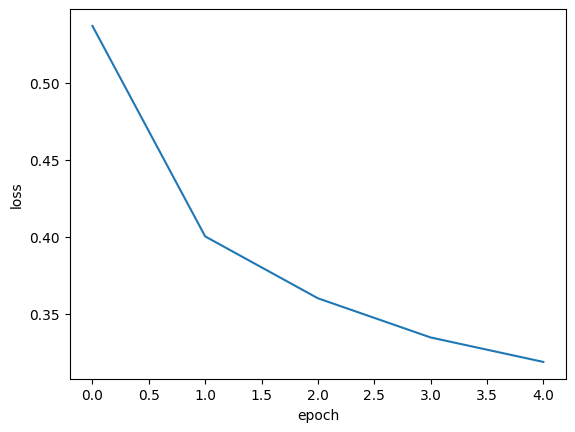

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

파이썬 리스트의 인덱스는 0부터 시작하므로 5개의 에포크가 0에서부터 4까지 x축에 표현된다.  
y축은 계산된 손실 값이다.  


이번에는 정확도를 출력해보자.

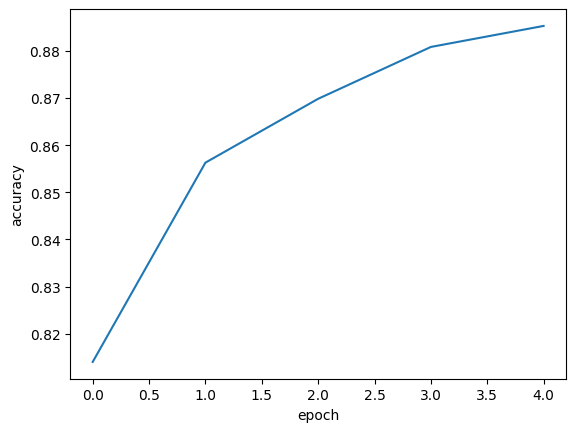

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

에포크마다 손실이 감소하고 정확도가 항상하는 것을 확인할 수 있다.  
그렇다면 에포크를 늘려서 더 훈련해보면 손실이 계속 감소하니 정확도도 높아질 것이다.  

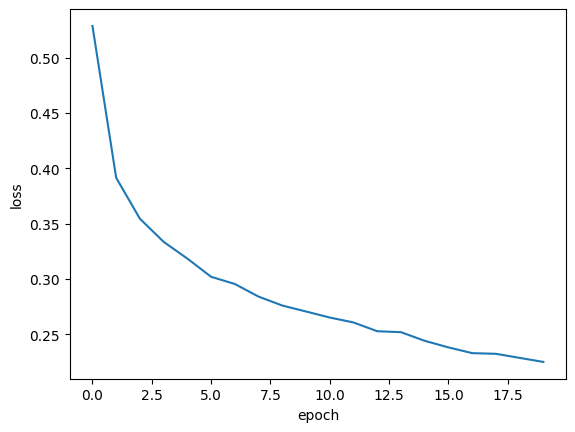

In [ ]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 검증 손실

참고: 손실을 사용하는 것과 정확도를 사용하는 것의 차이  

인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수이다.  
손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있다.  
따라서 모델이 잘 훈련되었는지 판단ㄴ하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 좋다.  



In [ ]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target))

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


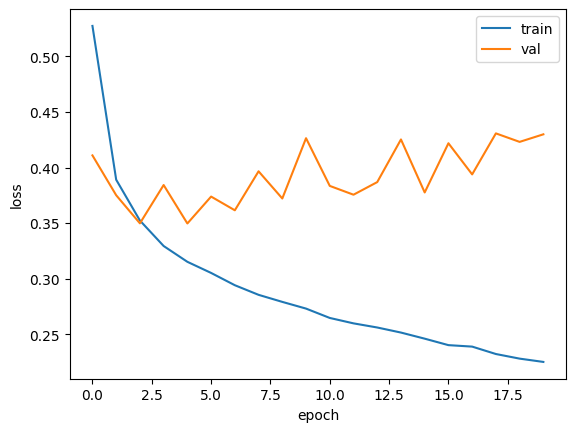

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

초기에 검증 손실이 감소하다가 다섯 번째 에포크 만에 다시 상승하기 시작함.  
훈련 손실은 꾸준히 감소하기 때문에 전형적인 과대적합 모델이 만들어진다.  
검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 증가한다.  


옵티마이저 하이퍼파라미터를 조정해 과대적합을 완화시키기  


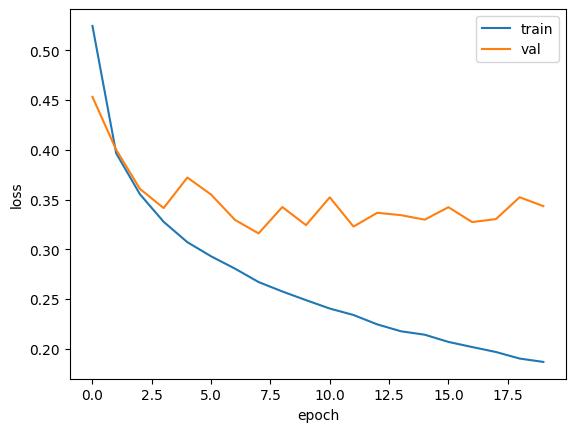

In [ ]:
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 드롭아웃

이 방식은 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(즉 뉴런의 출력을 0으로 만들어)과대적합을 막는다.  


어떤 샘플을 처리할 때는 은닉층의 두 번째 뉴런이 드롭아웃되어 h2 출력이 없다.  
다른 샘플을 처리할 때는 은닉층의 첫 번째 누런이 드롭아웃되어 h1 출력이 없다.  
뉴런은 랜덤하게 드롭아웃되고 얼마나 많은 뉴런을 드롭할지는 우리가 정해야할 하이퍼 파라미터이다.  


드롭아웃이 과대적합을 막는 이유  
> 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의를 기울여야 한다. 일부 뉴런의 출력이 없을 수 있는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있을 것이다.  

> 또 다른 해석은 앞의 드롭아웃이 적용된 2개의 신경망 그림을 보면 드롭아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블하는 것과 같다.  


In [ ]:
model = model_fn(keras.layers.Dropout(0, 3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


출력 결과에서 볼 수 있듯이 은닉층 뒤에 추가된 드롭아웃 층(Dropout)은 훈련되는 모델 파라미터가 없다.  
또한 입력과 출력의 크기가 같다.  
일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않는다.  


텐서플로와 케라스는 모델을 평가와 예측에 사용할 때는 자동으로 드롭아웃을 적용하지 않는다.  


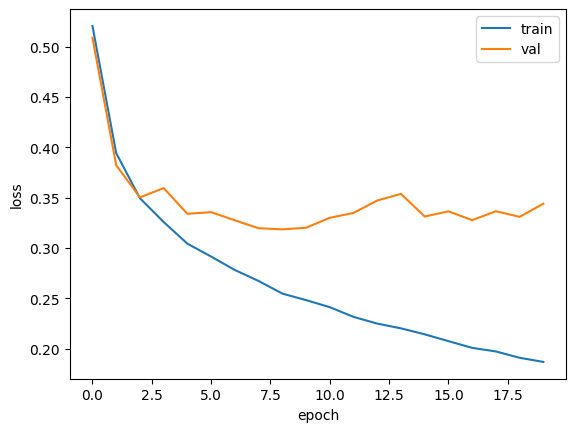

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

과대적합이 확실히 줄었다는 것을 확인할 수 있다.  
그러나 이 모델은 20번의 에포크 동안 훈련을 했기에 결국 다소 과대적합 되어 있다.  
그렇다면 과대적합 되지 않은 모델을 얻기 위해 에포크 횟수를 10으로 하고 다시 훈련해보자.  

# 모델 저장과 복원

에포크 횟수를 10으로 다시 지정하고 모델을 훈련해보자.  


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 10, verbose = 0,
                    validation_data = (val_scaled, val_target))

케라스 모델은 훈련된 모델의 파라미터를 저장하는 간편한 save_weights() 메서드를 제공한다.  
기본적으로 이 메서드는 텐서플로의 체크포인트 포맷으로 저장하지만 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장한다.  


In [ ]:
model.save_weights('model-weights.h5')

또한 모델 구조와 모델 파라미터를 함께 저장하는 save() 메서드도 제공한다.  
기본적으로 이 메서드는 텐서플로의 SavedModel 포맷으로 저장하지만 파일의 확장자가 '.h5'일 경우 HDF5 포맷으로 저장한다.  


In [ ]:
model.save('model-whole.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!ls -al *.h5

-rw-r--r-- 1 root root 333320 Jul 27 02:15 model-weights.h5
-rw-r--r-- 1 root root 981176 Jul 27 02:15 model-whole.h5


첫 번쨰는 훈련을 하지 않은 새로운 모델을 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용함.  
두 번째는 model-weights.h5 파일에서 새로운 모델을 만들어 사용한다.  

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [ ]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 1ms/step
0.8805


In [ ]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3329 - accuracy: 0.8805


[0.33288994431495667, 0.8805000185966492]

# 콜백

훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체로 keras.callbacks 패키지 아래에 있는 클래스들이다.  
fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용한다.  
여기서 사용할 ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 저장한다.  
save_best_only = True 매개변수를 지정하여 가장 낮은 검증 손실을 만드는 모델을 저장할 수 있다.  


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                 save_best_only = True)

model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
          validation_data = (val_scaled, val_target),
          callbacks = [checkpoint_cb])


모델이 훈련한 후에 best-model.h5에 최상의 검증 점수를 낸 모델이 저장된다.  
이 모델을 load_model() 함수로 다시 읽어서 예측을 진행해보자.  

In [ ]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3163 - accuracy: 0.8873


[0.3163473904132843, 0.887333333492279]

ModelCheckpoint 콜백이 가장 낮은 검증 손실 모델을 저장해주었다.  


과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 조기종료라고 한다.  


EarlyStopping 콜백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정한다.  
예를 들어 다음 코드에서처럼 patience = 2로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지한다.  
또한 restore_best_weigths 매개변수를 True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌린다.  
EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있다.  



In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model-h5',
                                                save_best_only = True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2,
                                                  restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs = 20, verbose =0,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])


In [ ]:
print(early_stopping_cb.stopped_epoch)

8


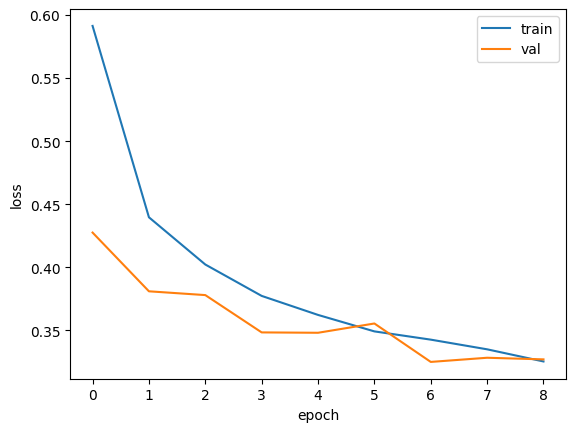

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.3250 - accuracy: 0.8791


[0.32503172755241394, 0.8790833353996277]